# Credit cards
simple credit card regression


In [37]:
# Get data from here:
# https://packt.link/wensZ

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400. # High res

In [39]:
df = pd.read_csv('Data/cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  26664 non-null  int64 
 1   ID                          26664 non-null  object
 2   LIMIT_BAL                   26664 non-null  int64 
 3   SEX                         26664 non-null  int64 
 4   EDUCATION                   26664 non-null  int64 
 5   MARRIAGE                    26664 non-null  int64 
 6   AGE                         26664 non-null  int64 
 7   PAY_1                       26664 non-null  int64 
 8   PAY_2                       26664 non-null  int64 
 9   PAY_3                       26664 non-null  int64 
 10  PAY_4                       26664 non-null  int64 
 11  PAY_5                       26664 non-null  int64 
 12  PAY_6                       26664 non-null  int64 
 13  BILL_AMT1                   26664 non-null  in

In [40]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', "PAY_6"]
df[pay_features].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [41]:
df[pay_features[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<AxesSubplot:>

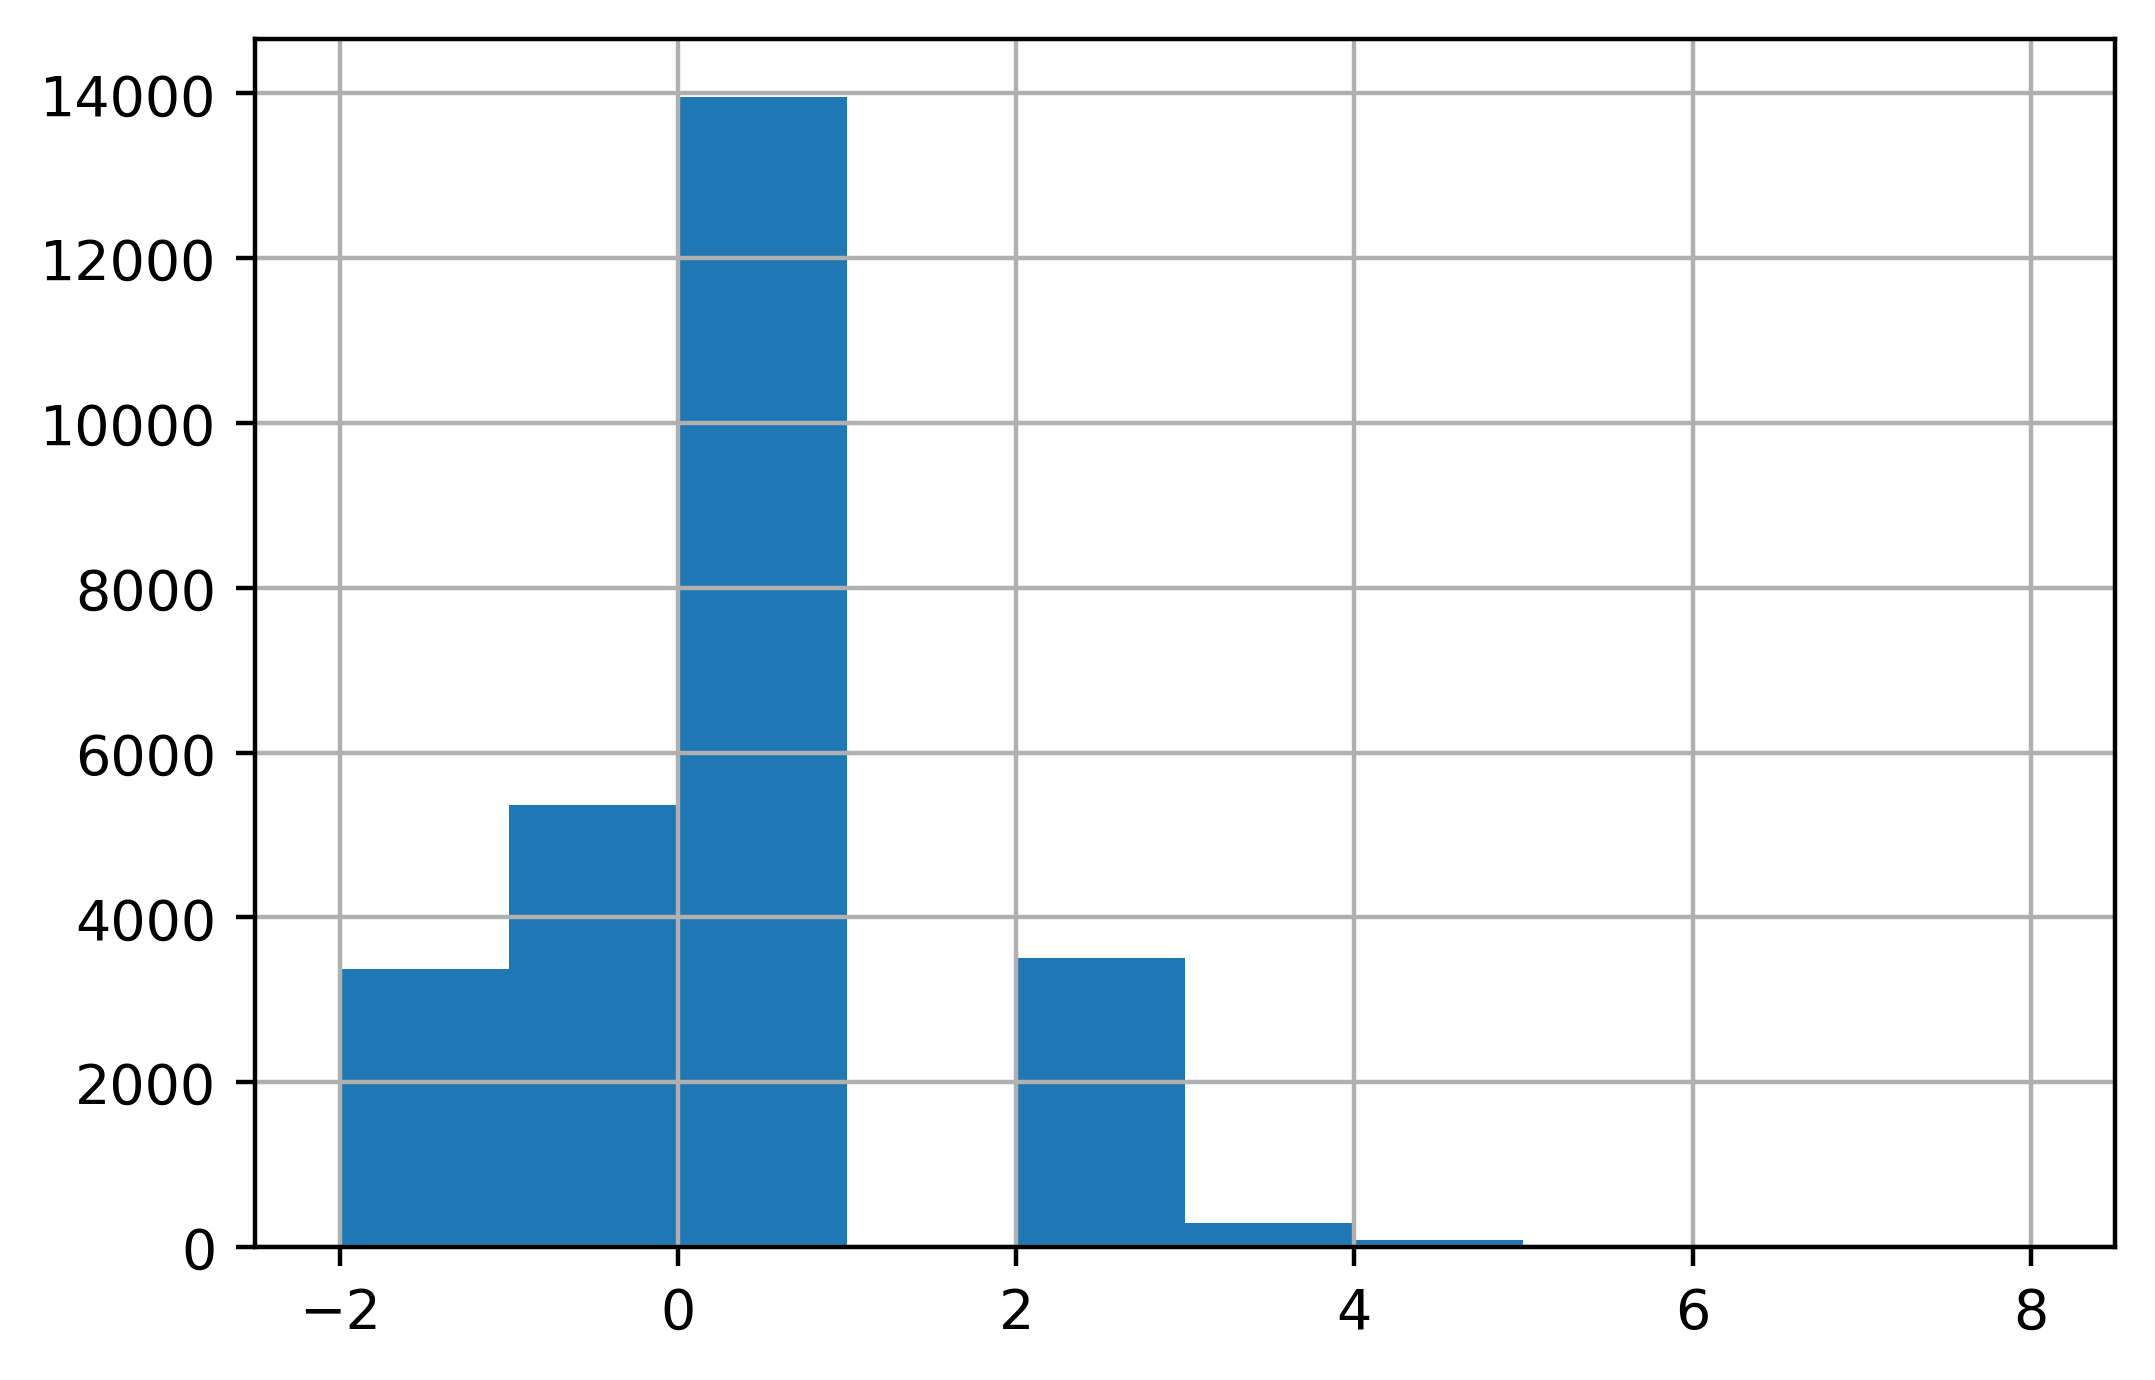

In [42]:
df[pay_features[1]].hist()

In [43]:
pay_bins = np.array(range(-2, 10)) - 0.5
pay_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accountes')

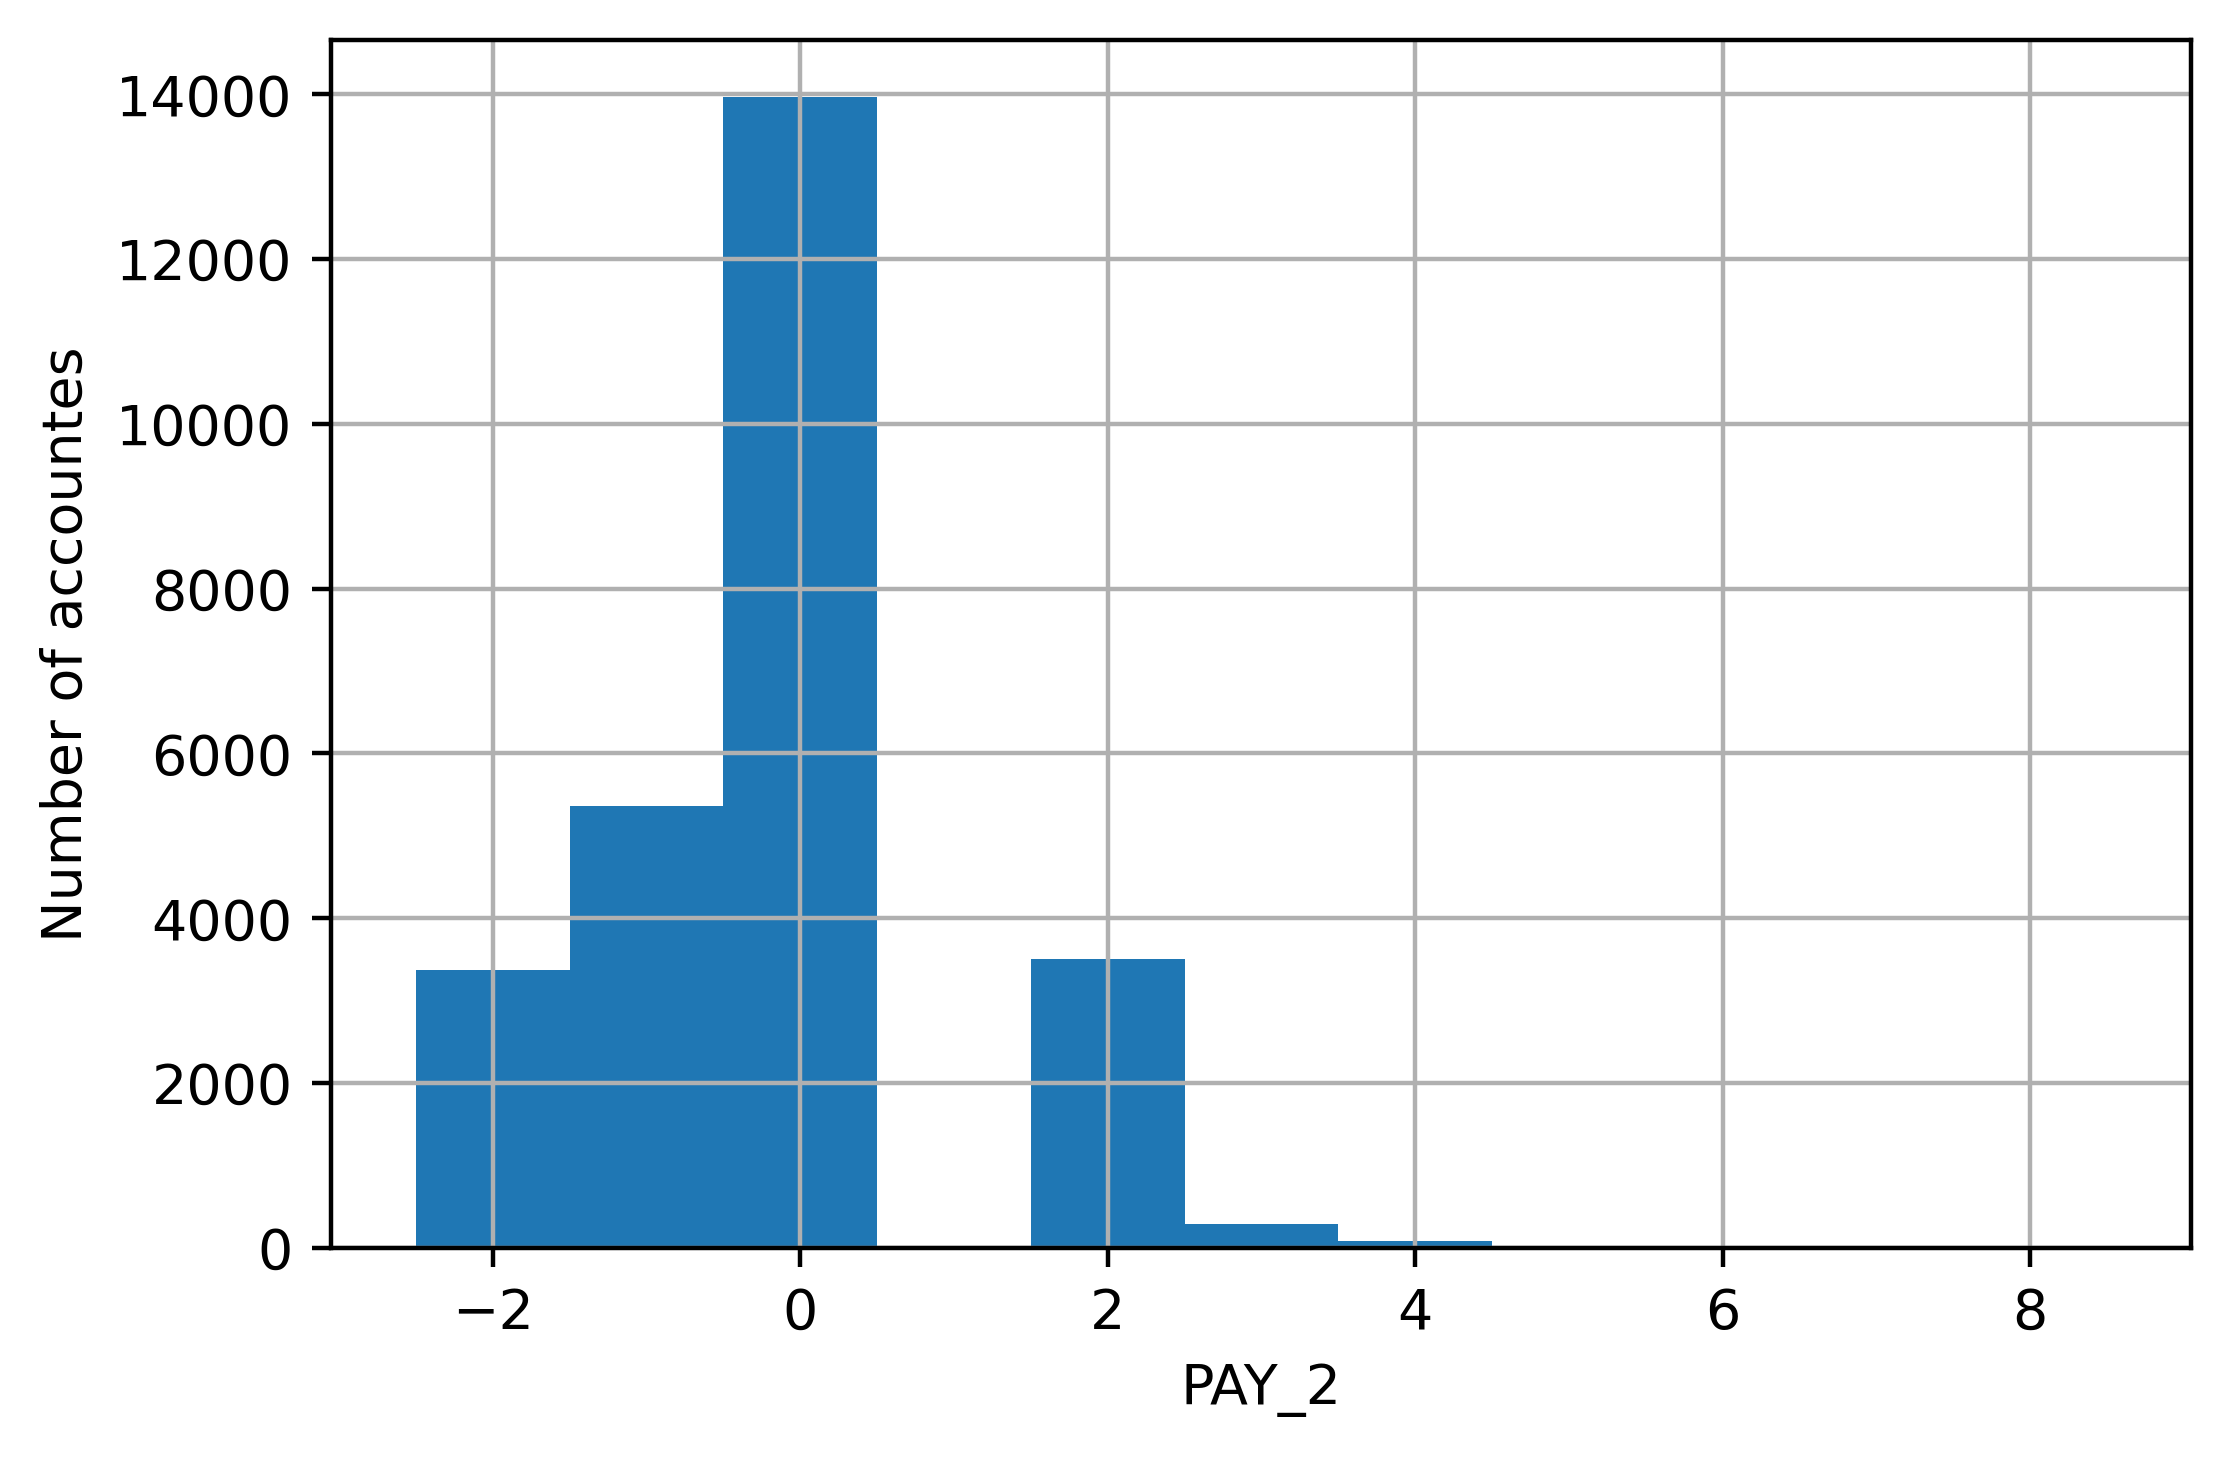

In [44]:
df[pay_features[1]].hist(bins=pay_bins)
plt.xlabel('PAY_2')
plt.ylabel('Number of accountes')

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

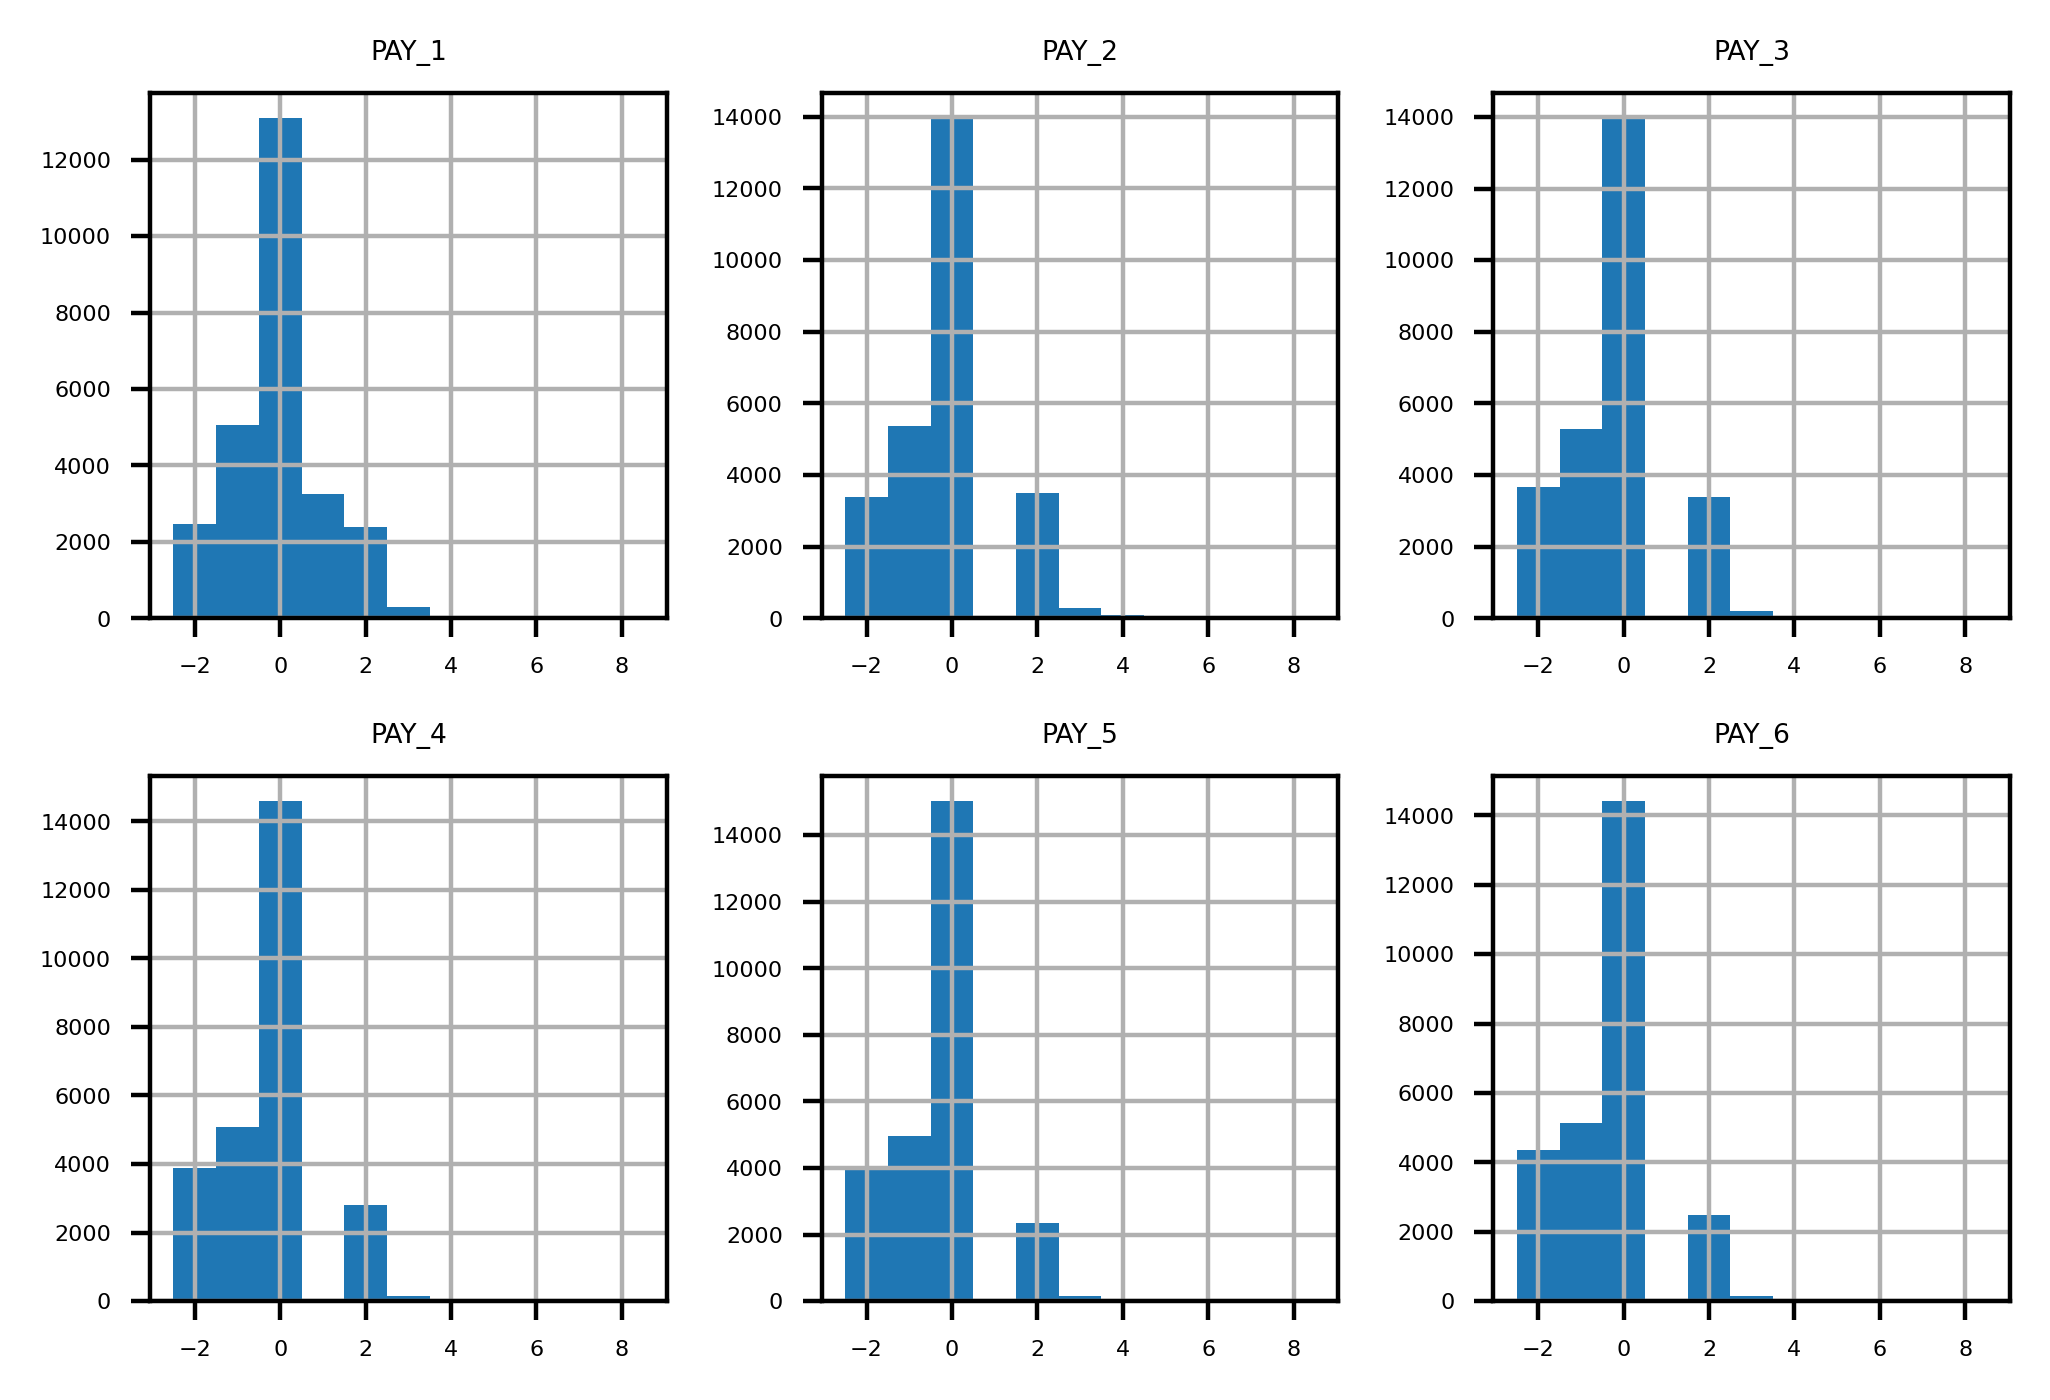

In [45]:
mpl.rcParams['font.size'] = 4
df[pay_features].hist(bins=pay_bins, layout=(2,3))

In [46]:
df2 = df.set_index(['PAY_1', 'PAY_2'])

In [47]:
df2.index

MultiIndex([( 2,  2),
            (-1,  2),
            ( 0,  0),
            ( 0,  0),
            (-1,  0),
            ( 0,  0),
            ( 0,  0),
            ( 0, -1),
            ( 0,  0),
            (-2, -2),
            ...
            ( 0,  0),
            ( 3,  2),
            ( 0,  0),
            ( 0, -1),
            ( 2,  2),
            ( 0,  0),
            (-1, -1),
            ( 4,  3),
            ( 1, -1),
            ( 0,  0)],
           names=['PAY_1', 'PAY_2'], length=26664)

In [48]:
df2.query("PAY_1 == 0")

Unnamed: 0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  \
PAY_1 PAY_2                                                                   
0      0              2  85698822-43f5      90000    2          2         2   
       0              3  0737c11b-be42      50000    2          2         1   
       0              5  ceae2946-47e4      50000    1          1         2   
       0              6  d3b8ce26-9c89     500000    1          1         2   
      -1              7  d6e1911b-54d0     100000    2          2         2   
...                 ...            ...        ...  ...        ...       ...   
       0          26654  33170a20-8592     140000    1          2         1   
       0          26656  4849f25c-3f1f      10000    1          3         1   
      -1          26657  62c53ee3-f0cf     100000    1          1         2   
       0          26659  ecff42d0-bdc6     220000    1          3         1   
       0          26663  15d69f9f-5ad3      50000    1          2         1   

             AGE  PAY_3  PAY_4  PAY_5  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
PAY_1 PAY_2                            ...                                 
0      0      34      0      0      0  ...      1000      1000      1000   
       0      37      0      0      0  ...      1200      1100      1069   
       0      37      0      0      0  ...       657      1000      1000   
       0      29      0      0      0  ...     38000     20239     13750   
      -1      23     -1      0      0  ...         0       581      1687   
...          ...    ...    ...    ...  ...       ...       ...       ...   
       0      41      0      0      0  ...      4228      1505      2000   
       0      43      0     -2     -2  ...         0         0         0   
      -1      38     -1      0      0  ...      4000      3000      2000   
       0      39      0      0      0  ...      5003      3047      5000   
       0      46      0      0      0  ...      1430      1000      1000   

             PAY_AMT6  default payment next month  EDUCATION_CATEGORY  \
PAY_1 PAY_2                                                             
0      0         5000                           0          university   
       0         1000                           0          university   
       0          800                           0     graduate school   
       0        13770                           0     graduate school   
      -1         1542                           0          university   
...               ...                         ...                 ...   
       0         2000                           0          university   
       0            0                           0         high school   
      -1         2000                           0     graduate school   
       0         1000                           0         high school   
       0         1000                           1          university   

             graduate school  high school  others  university  
PAY_1 PAY_2                                                    
0      0                   0            0       0           1  
       0                   0            0       0           1  
       0                   1            0       0           0  
       0                   1            0       0           0  
      -1                   0            0       0           1  
...                      ...          ...     ...         ...  
       0                   0            0       0           1  
       0                   0            1       0           0  
      -1                   1            0       0           0  
       0                   0            1       0           0  
       0                   0            0       0           1  

[13087 rows x 29 columns]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split\
                                   (df['EDUCATION']\
                                    .values.reshape(-1,1),\
                                    df['default payment next month']\
                                    .values, test_size=0.2,\
                                    random_state=24)


In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,
                       class_weight=None,
                       dual=False,
                       fit_intercept=True,
                       intercept_scaling=1,
                       max_iter=100,
                       multi_class='auto',
                       n_jobs=None,
                       penalty='l2',
                       random_state=None,
                       solver='liblinear',
                       tol=0.0001,
                       verbose=0,
                       warm_start=False)

In [51]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [52]:
y_pred = lr.predict(X_test)

In [53]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [54]:
lr.score(X_test, y_test)

0.7834239639977498

In [55]:
# Build a confusion matrix
P = sum(y_test)                      # Number of positive samples
TP = sum((y_test==1) & (y_pred==1))  # Number of True positives
TPR = TP / P

FN = sum((y_test==1) & (y_pred==0))  # Number of False Negatives
FNR = FN / P
TPR, FNR

(0.0, 1.0)

In [56]:
# Since True Positive Rate = 0 and False Negative rate = 1
# Our model basically predicts EVERYTHING is negative
# Its a "Null" model


In [57]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
TNR = TN / N

FP = sum((y_test==0) & (y_pred==1))
FPR = FP / N
TNR, FPR

(1.0, 0.0)

In [58]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

In [59]:
y_pred_proba = lr.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]

Text(0, 0.5, 'Number of samples')

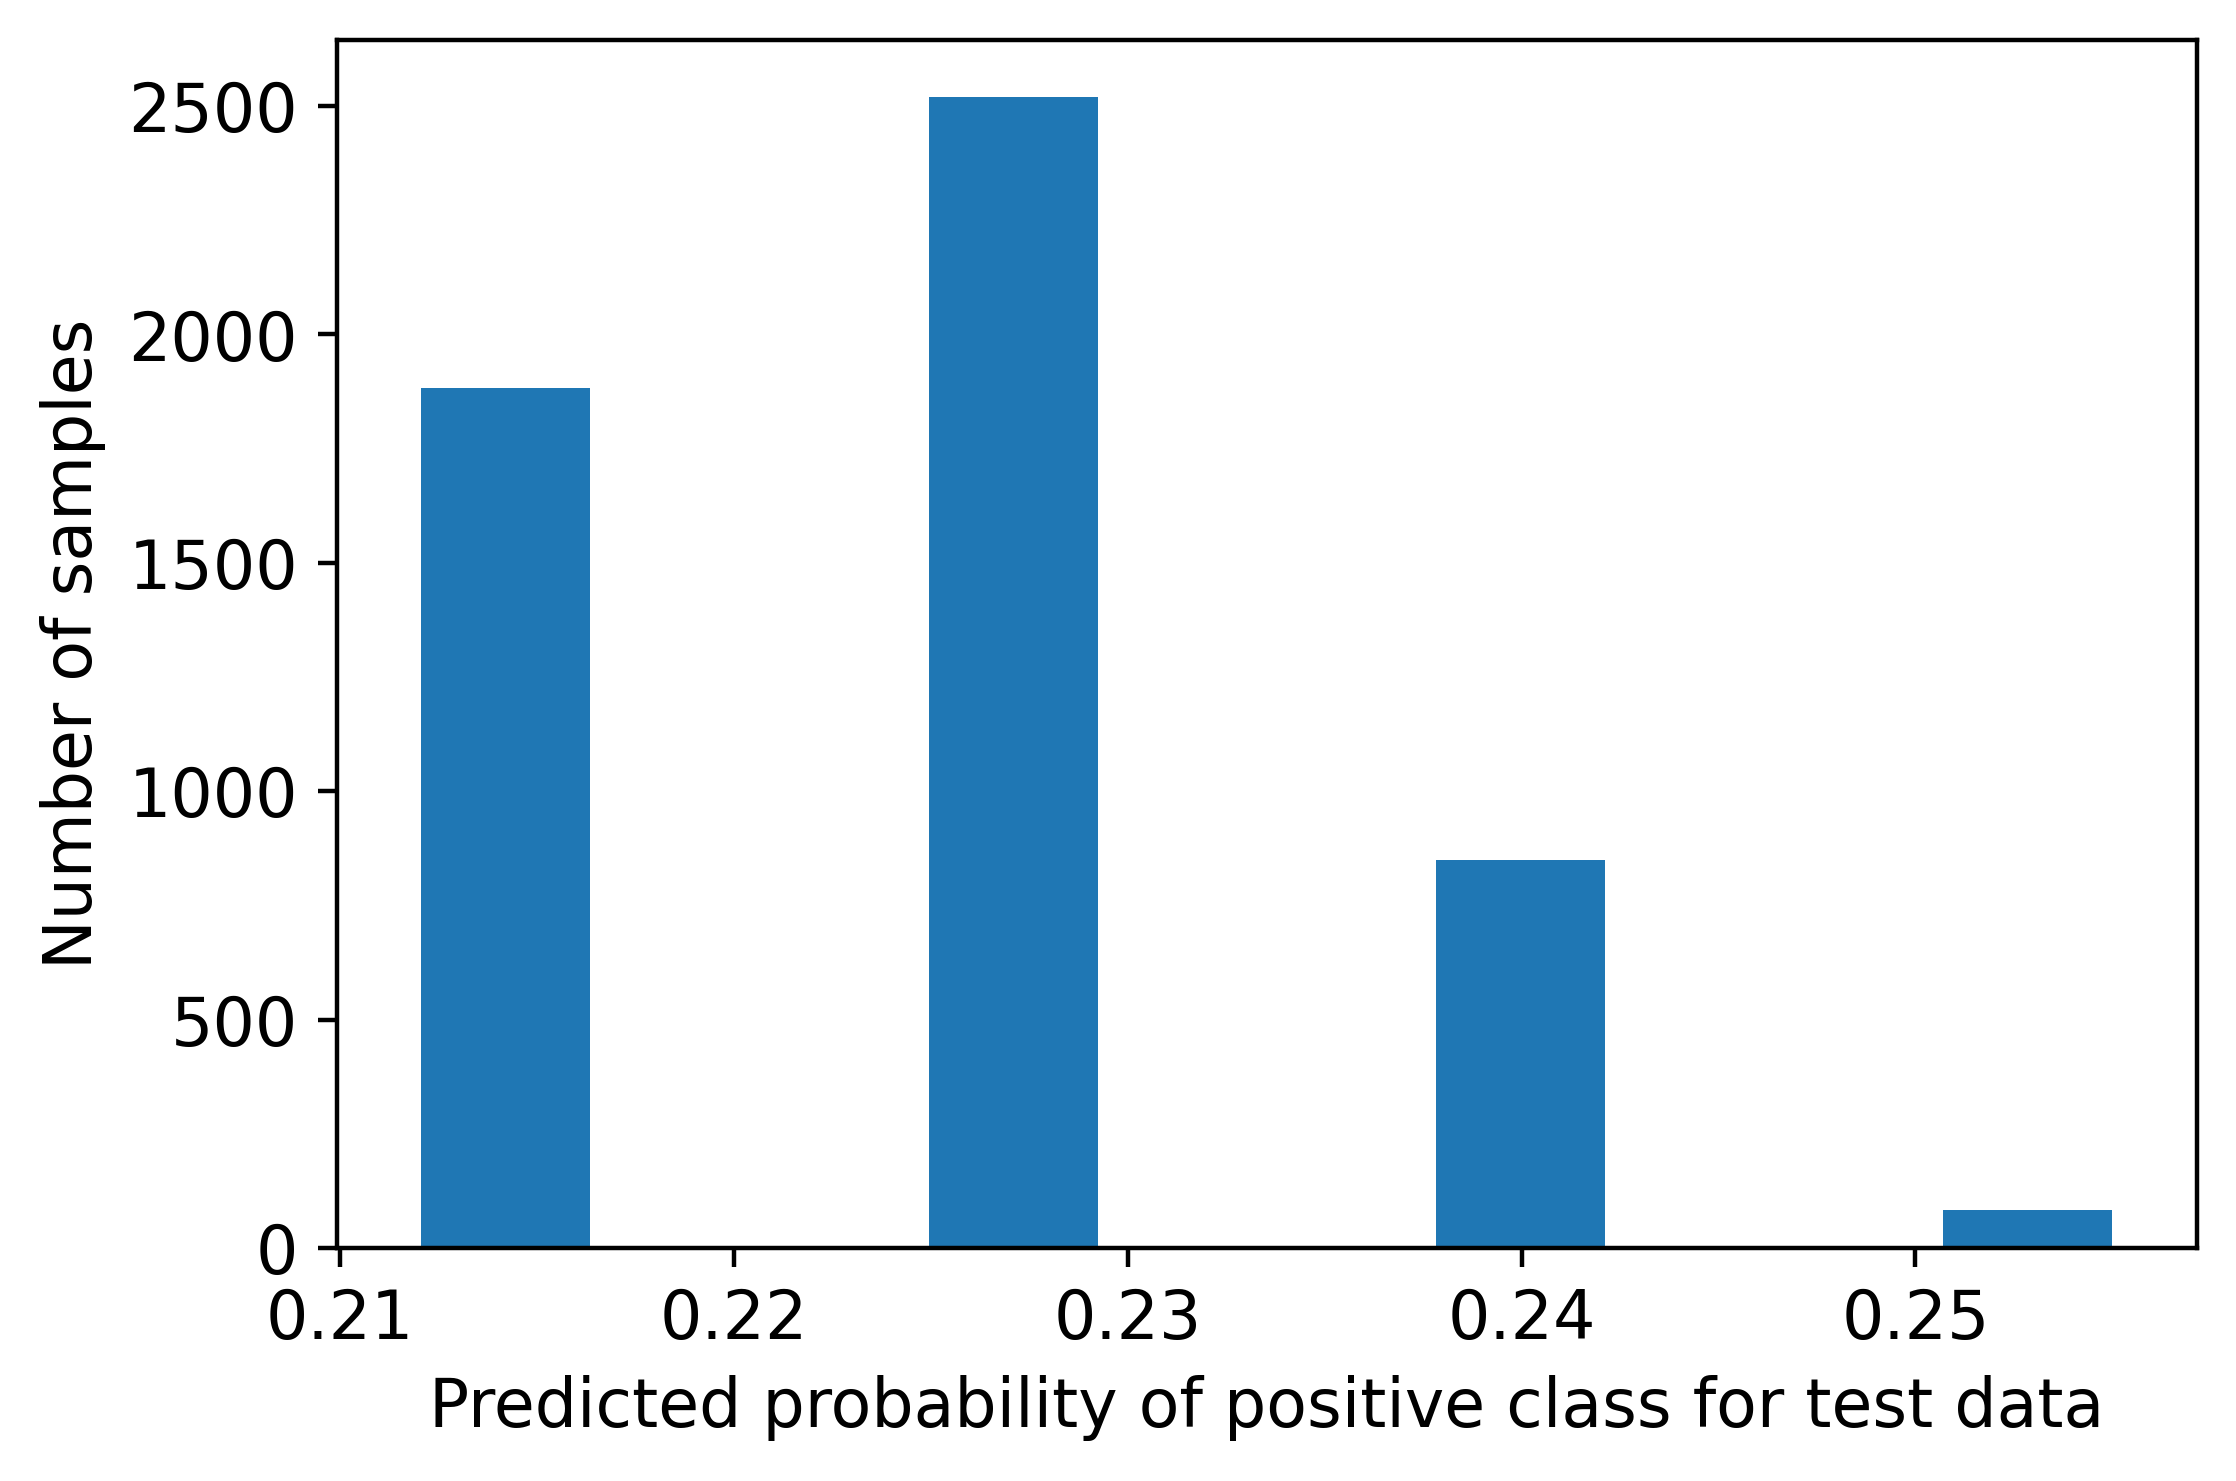

In [60]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class '\
           'for test data')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

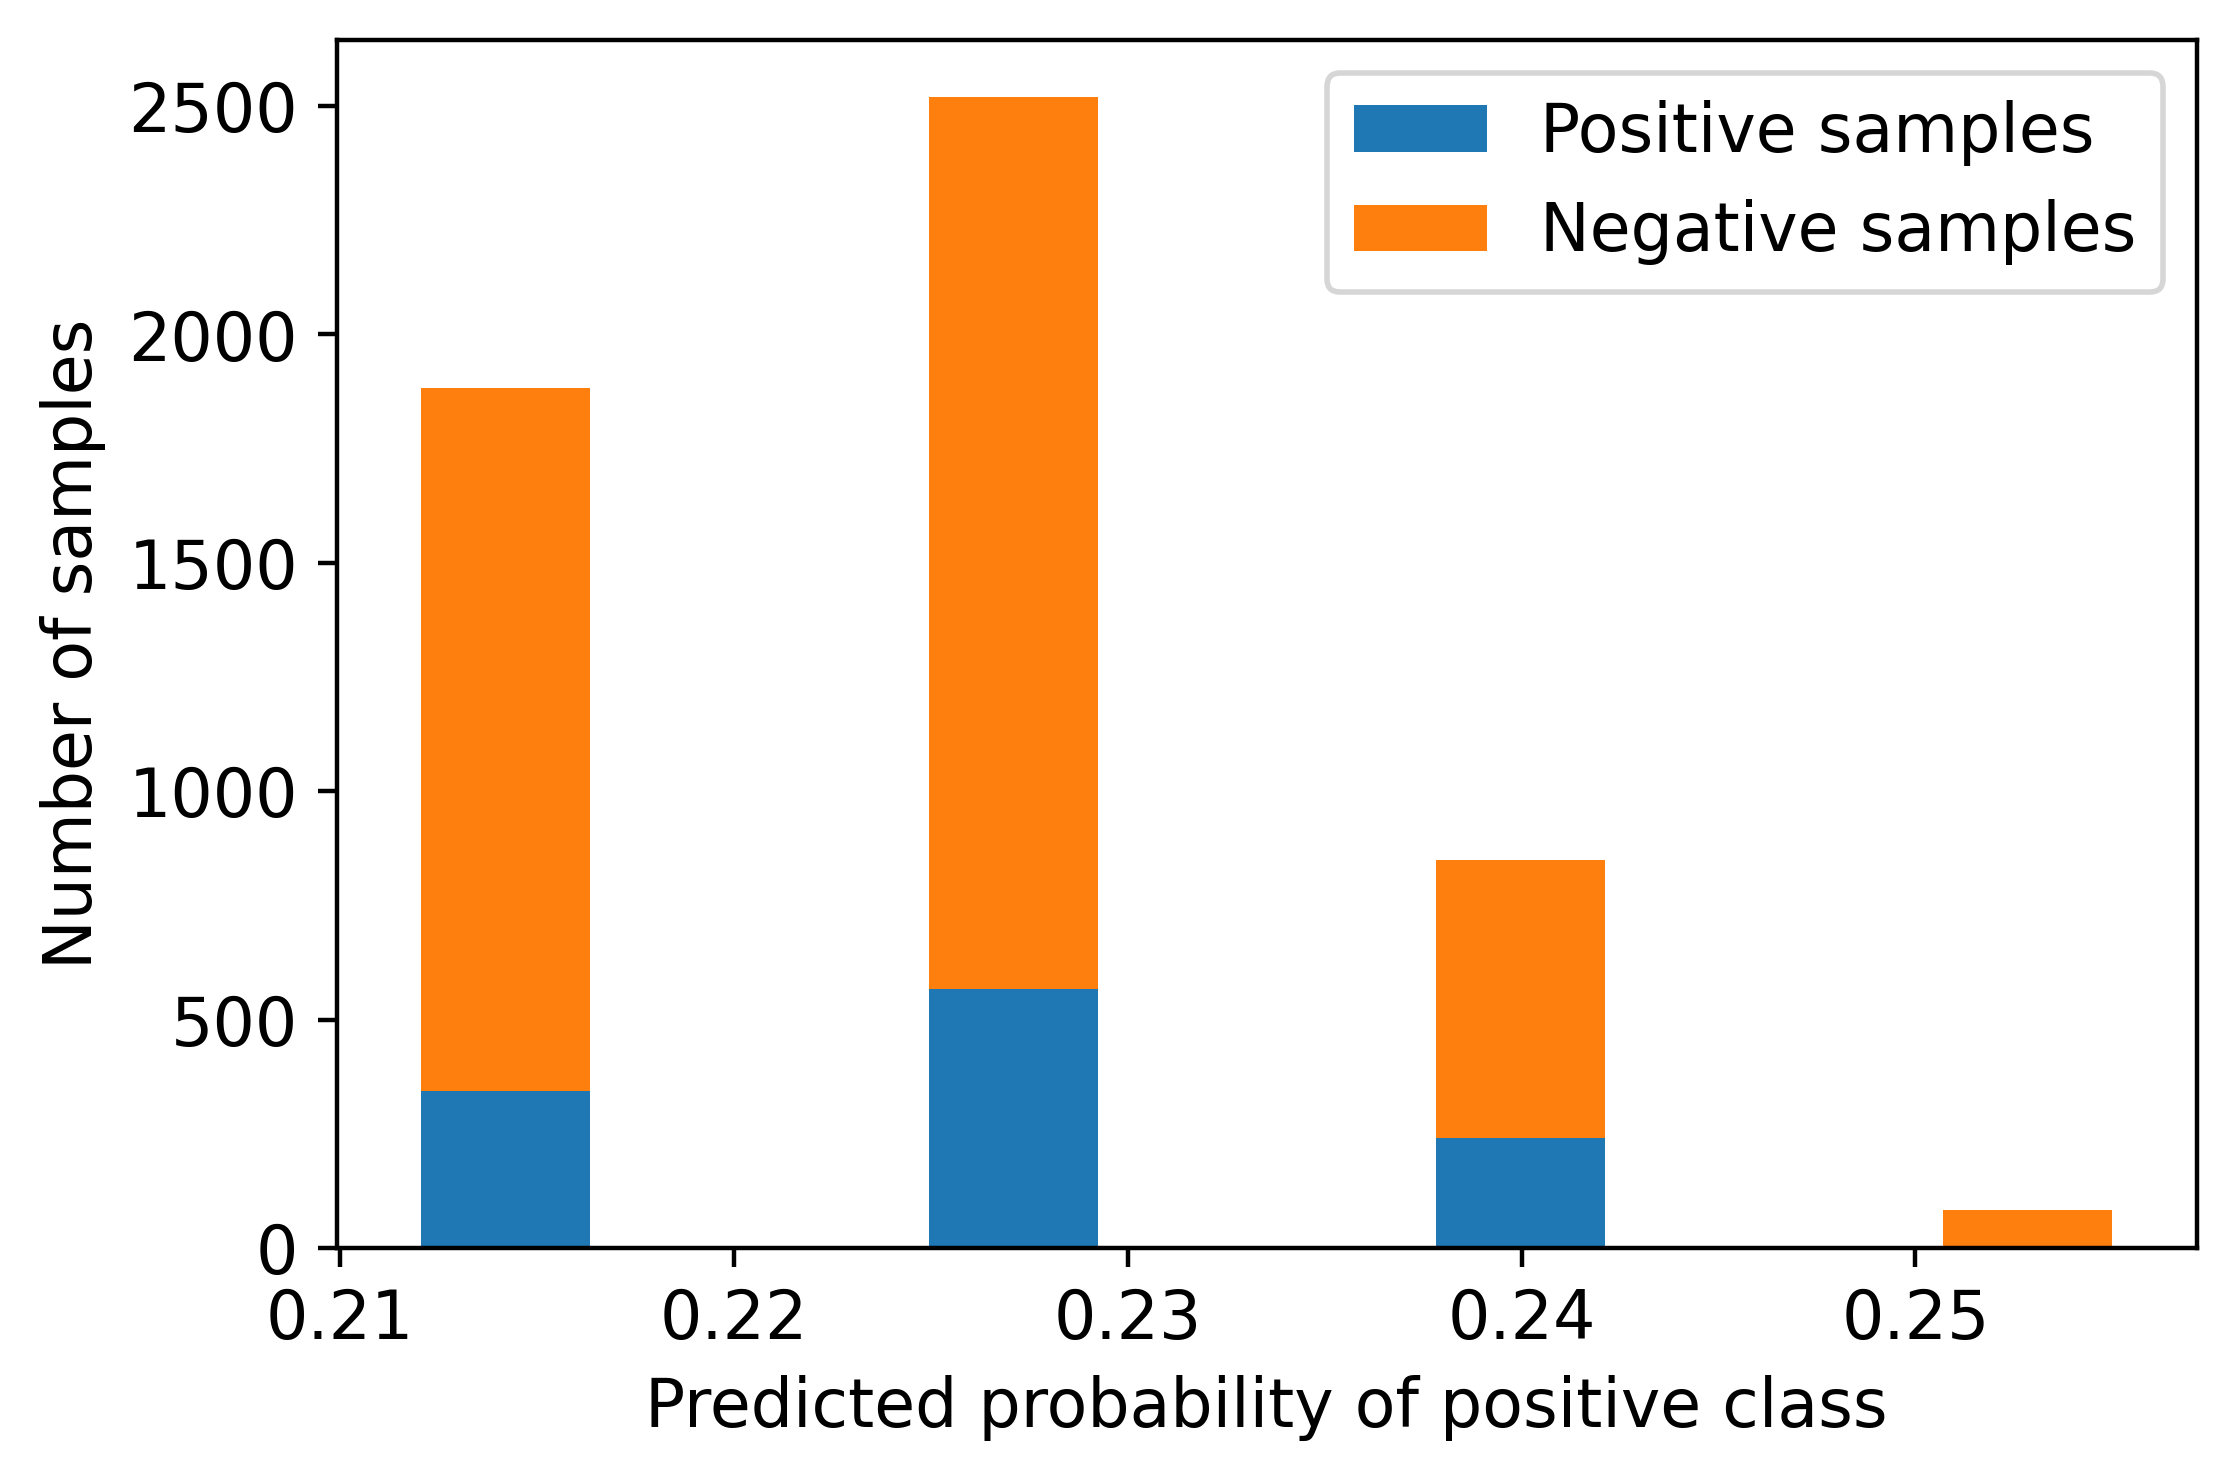

In [61]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],\
          histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [62]:
from sklearn import metrics
fpr, tpr, trehsolds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC Curve')

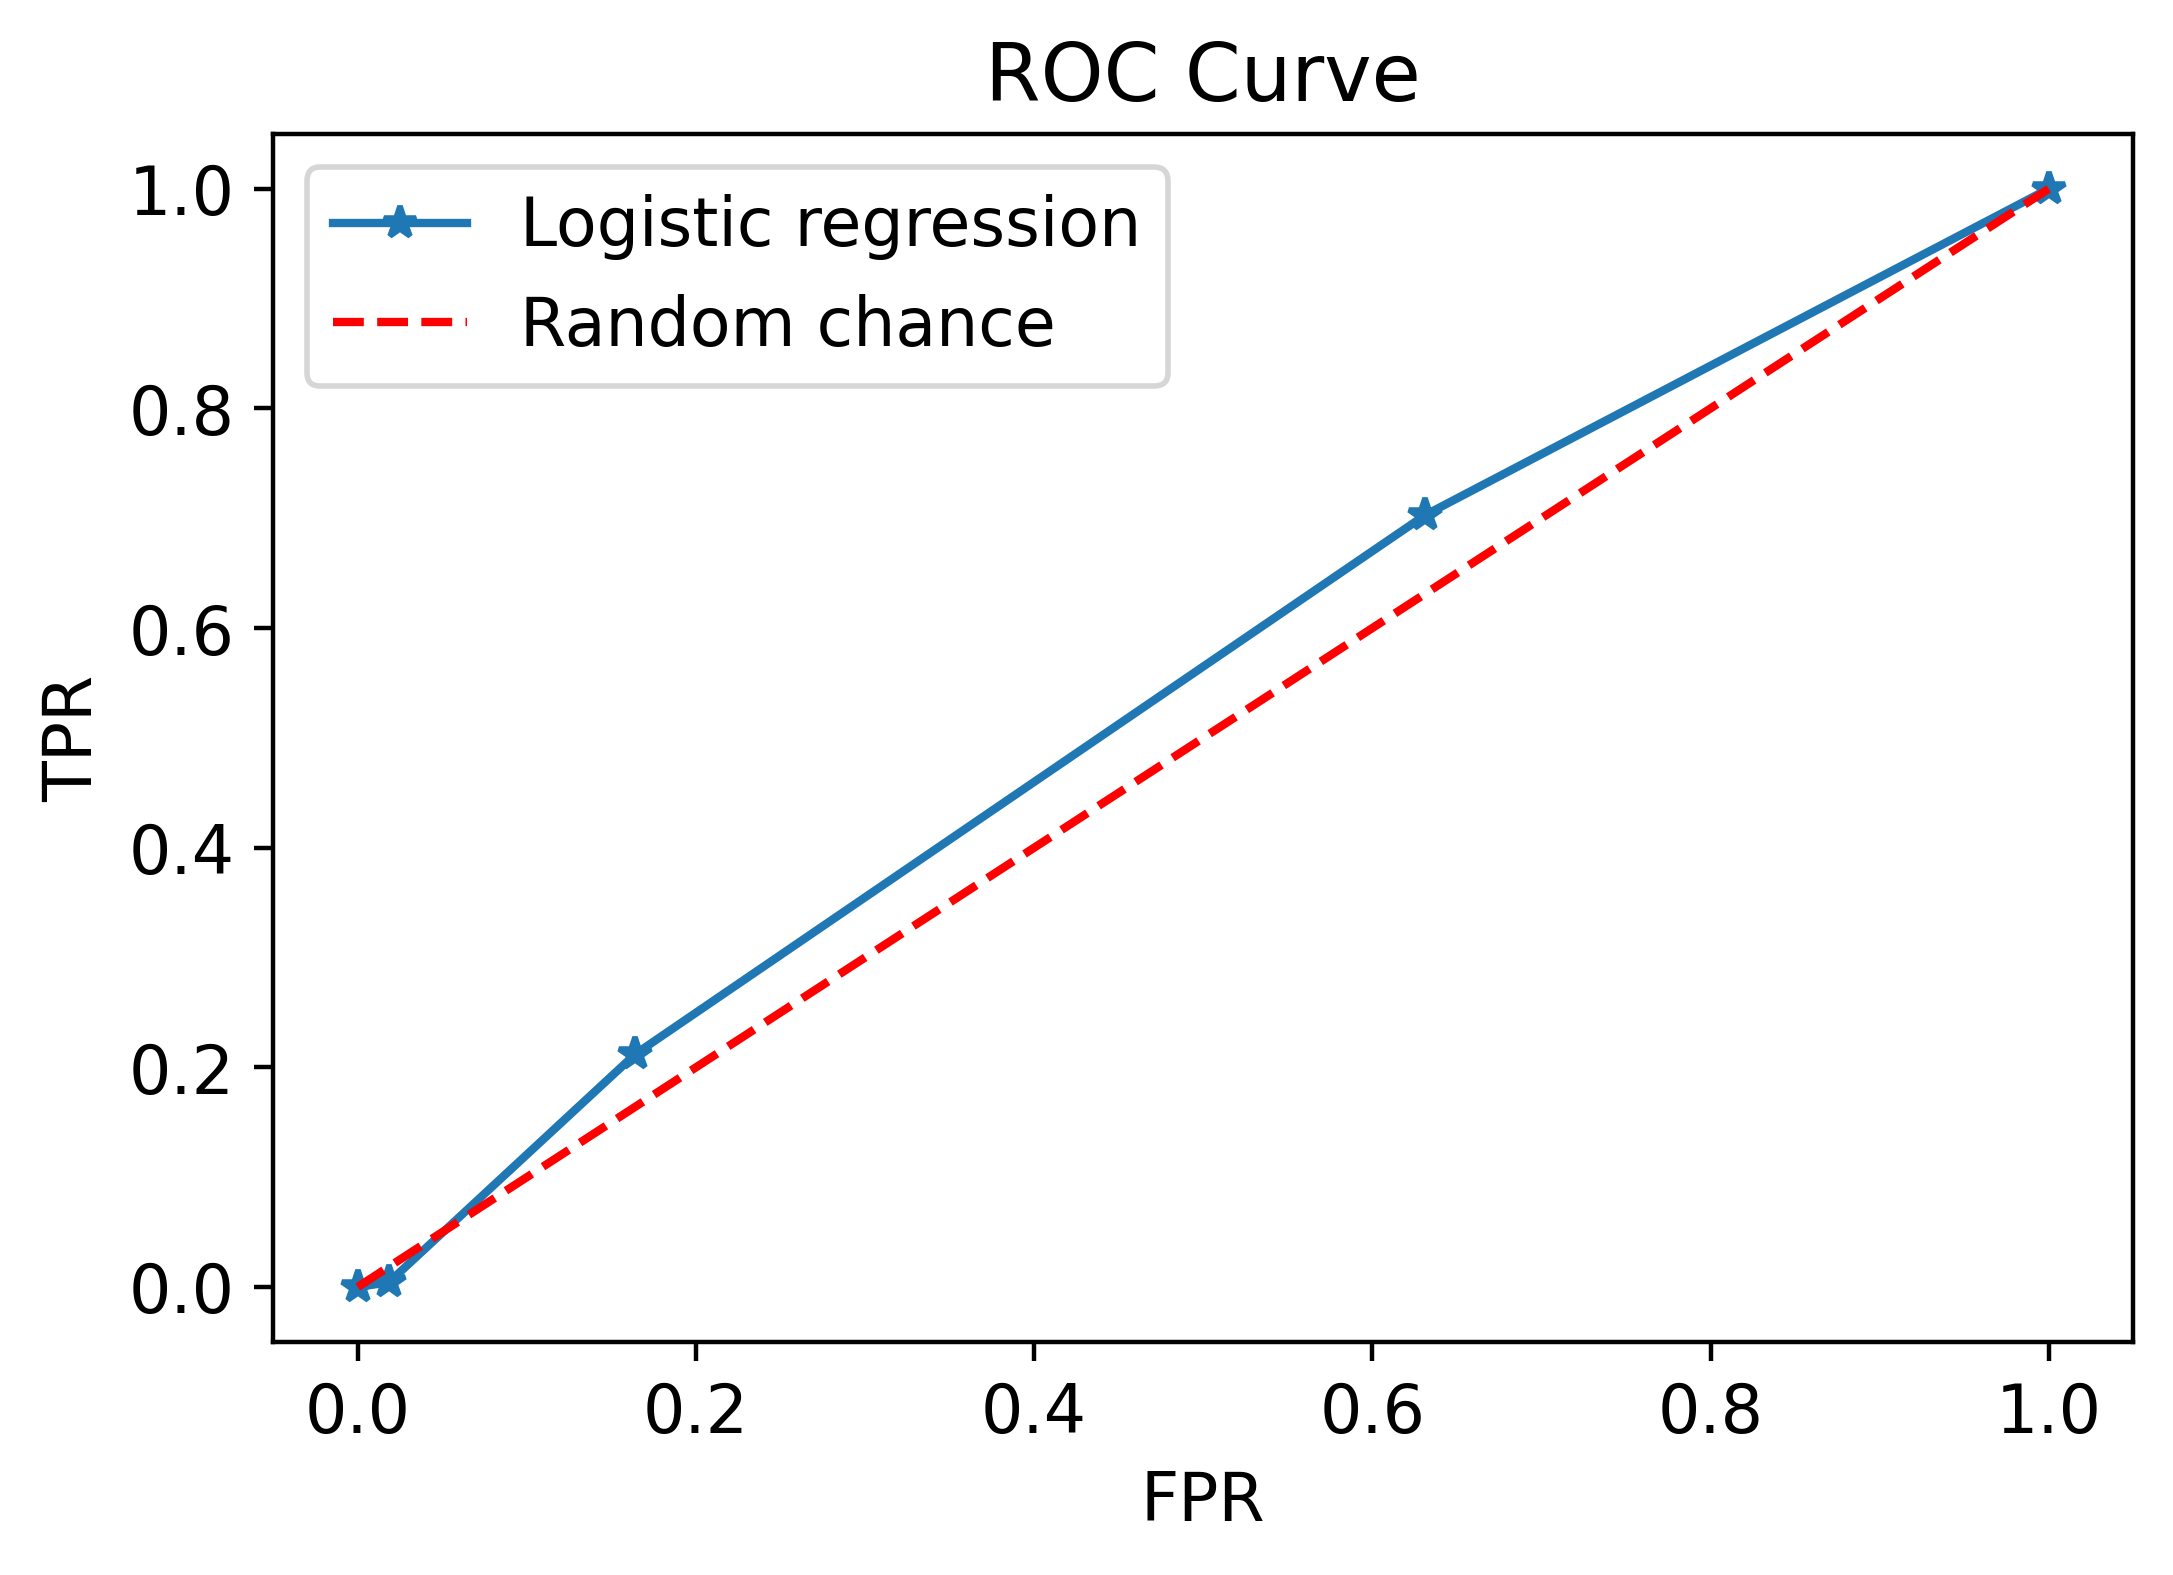

In [64]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")

In [68]:
# precision = tp / (tp + fp)

0